In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
p = Path('/home/shreyas/ESS25_AD/budyko_sellers/forward_experiment/')

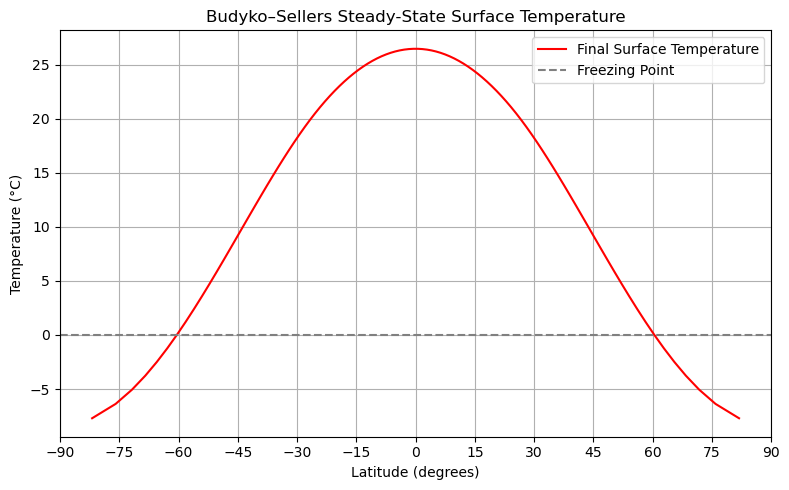

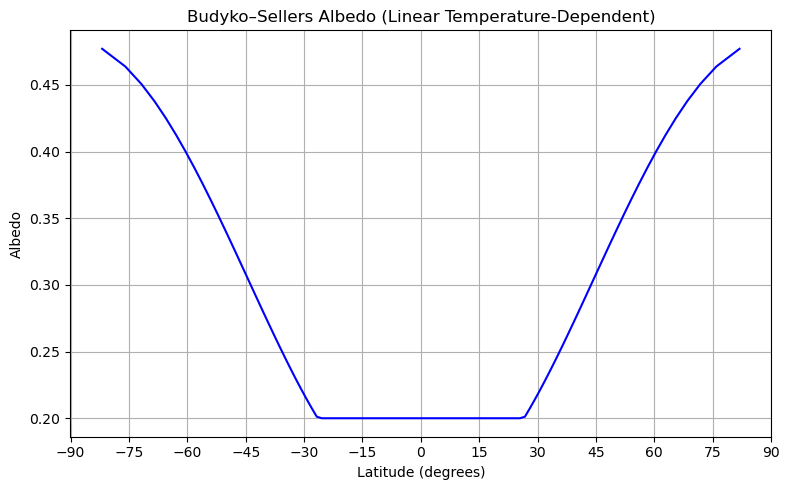

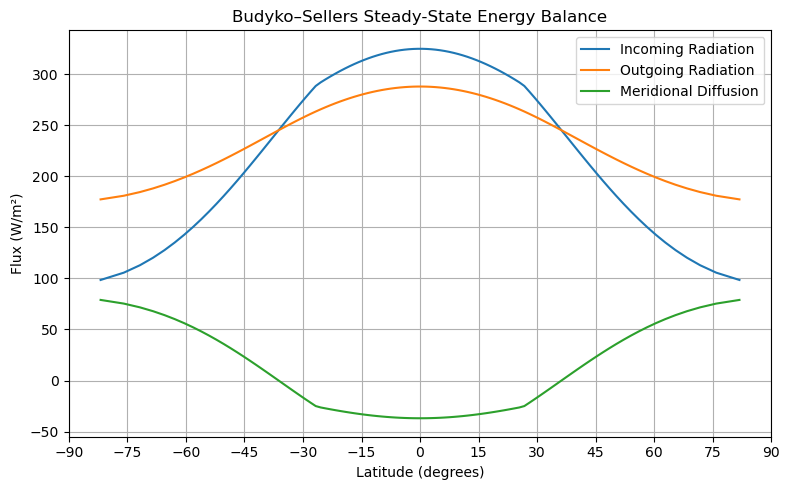

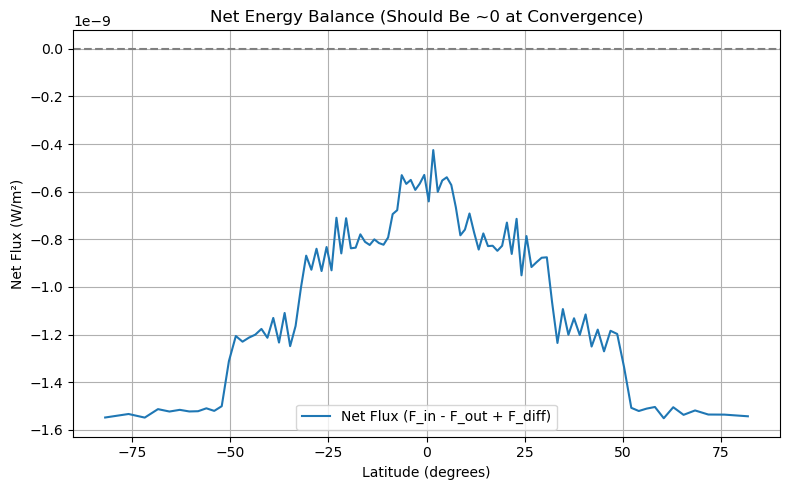

In [3]:

# Load data
lat = np.loadtxt(p / 'latitude.txt')          # degrees
T = np.loadtxt(p / 'temperature.txt')         # Kelvin
alpha = np.loadtxt(p / 'albedo.txt')          # unitless
F_in = np.loadtxt(p / 'F_in.txt')             # W/m^2
F_out = np.loadtxt(p / 'F_out.txt')           # W/m^2
F_diff = np.loadtxt(p / 'F_diff.txt')         # W/m^2
net_flux = np.loadtxt(p / 'net_flux.txt')     # W/m^2

# --- Plot temperature
plt.figure(figsize=(8, 5))
plt.plot(lat, T - 273.15, 'r-', label='Final Surface Temperature')
plt.axhline(0, color='gray', linestyle='--', label='Freezing Point')
plt.title('Budyko–Sellers Steady-State Surface Temperature')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xticks(np.linspace(-90, 90, 13))
plt.tight_layout()
plt.show()

# --- Plot albedo
plt.figure(figsize=(8, 5))
plt.plot(lat, alpha, 'b-')
plt.title('Budyko–Sellers Albedo (Linear Temperature-Dependent)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Albedo')
plt.grid(True)
plt.xticks(np.linspace(-90, 90, 13))
plt.tight_layout()
plt.show()

# --- Plot energy balance terms
plt.figure(figsize=(8, 5))
plt.plot(lat, F_in, label='Incoming Radiation')
plt.plot(lat, F_out, label='Outgoing Radiation')
plt.plot(lat, F_diff, label='Meridional Diffusion')
plt.title('Budyko–Sellers Steady-State Energy Balance')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Flux (W/m²)')
plt.grid(True)
plt.legend()
plt.xticks(np.linspace(-90, 90, 13))
plt.tight_layout()
plt.show()

# --- Plot net energy flux
plt.figure(figsize=(8, 5))
plt.plot(lat, net_flux, label='Net Flux (F_in - F_out + F_diff)')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Net Energy Balance (Should Be ~0 at Convergence)')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Net Flux (W/m²)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
p = Path('/home/shreyas/ESS25_AD/budyko_sellers/forward_experiment/')
p_tap = Path('/home/shreyas/ESS25_AD/budyko_sellers/tapenade_experiment/')

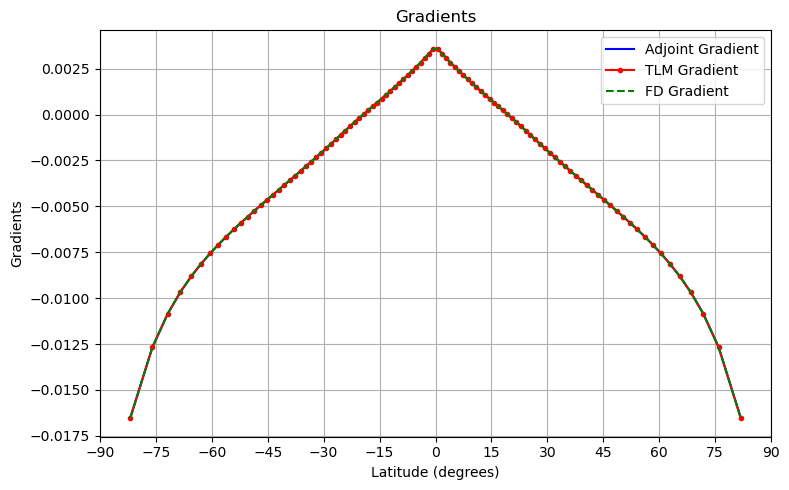

In [11]:
# Load data
grad_ad = np.loadtxt(p_tap / 'dJdX_from_adjoint.txt')
grad_tl = np.loadtxt(p_tap / 'dJdX_from_adjoint.txt')
grad_fd = np.loadtxt(p / 'dJdX_from_finite_differences.txt')

plt.figure(figsize=(8, 5))
plt.plot(lat, grad_ad, "b", label='Adjoint Gradient')
plt.plot(lat, grad_tl, "r.-", label='TLM Gradient')
plt.plot(lat, grad_fd, "g--", label='FD Gradient')
plt.title('Gradients')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Gradients')
plt.grid(True)
plt.legend()
plt.xticks(np.linspace(-90, 90, 13))
plt.tight_layout()
plt.show()